In [11]:
import tensorflow as tf
from keras import layers
from tensorflow import keras

(Xtrain, Ytrain), (Xtest, Ytest) = keras.datasets.cifar10.load_data()

In [20]:
Xtrain_normalize = Xtrain.astype("float32") / 255.0
Xtest_normalize = Xtest.astype("float32") / 255.0

Ytrain_ohe = keras.utils.to_categorical(Ytrain)
Ytest_ohe = keras.utils.to_categorical(Ytest)

In [21]:
model = tf.keras.models.Sequential((
    layers.Conv2D(filters=32,
                  kernel_size=(3, 3),
                  input_shape=(32, 32, 3),
                  activation='relu',
                  padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [32]:
train_epochs = 30
batch_size = 128
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(Xtrain_normalize, Ytrain_ohe,
          validation_split=0.2,
          epochs=train_epochs,
          batch_size=batch_size,
          verbose=2)

Epoch 1/30


2022-11-03 22:16:44.876039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-03 22:16:49.994957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 6s - loss: 0.7873 - accuracy: 0.7300 - val_loss: 0.9589 - val_accuracy: 0.6922 - 6s/epoch - 19ms/step
Epoch 2/30
313/313 - 5s - loss: 0.7625 - accuracy: 0.7385 - val_loss: 0.9303 - val_accuracy: 0.7015 - 5s/epoch - 16ms/step
Epoch 3/30
313/313 - 5s - loss: 0.7482 - accuracy: 0.7392 - val_loss: 0.9211 - val_accuracy: 0.7009 - 5s/epoch - 15ms/step
Epoch 4/30
313/313 - 5s - loss: 0.7294 - accuracy: 0.7461 - val_loss: 0.8941 - val_accuracy: 0.7140 - 5s/epoch - 16ms/step
Epoch 5/30
313/313 - 5s - loss: 0.7107 - accuracy: 0.7535 - val_loss: 0.9061 - val_accuracy: 0.7064 - 5s/epoch - 16ms/step
Epoch 6/30
313/313 - 5s - loss: 0.6955 - accuracy: 0.7573 - val_loss: 0.8985 - val_accuracy: 0.7058 - 5s/epoch - 16ms/step
Epoch 7/30
313/313 - 6s - loss: 0.6890 - accuracy: 0.7612 - val_loss: 0.8757 - val_accuracy: 0.7165 - 6s/epoch - 18ms/step
Epoch 8/30
313/313 - 5s - loss: 0.6696 - accuracy: 0.7679 - val_loss: 0.8793 - val_accuracy: 0.7119 - 5s/epoch - 17ms/step
Epoch 9/30
313/313 - 6s - l

In [34]:
test_loss, test_acc = model.evaluate(Xtest_normalize, Ytest_ohe)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.8571 - accuracy: 0.7082
Test accuracy: 0.7082000374794006


 36/313 [==>...........................] - ETA: 1s

2022-11-03 22:20:14.187434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


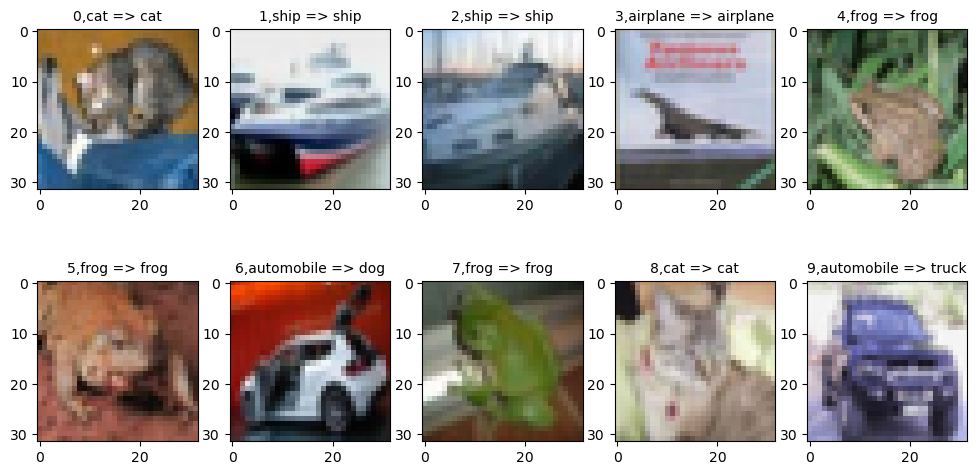

In [35]:
import numpy as np
from matplotlib import pyplot as plt

predictions = model.predict(Xtest_normalize)
label_dict = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog", 7: "horse",
              8: "ship", 9: "truck"}
# 定义显示图像数据及其对应标签的函数
def plot_images_labels_prediction(images, labels, prediction, index, num=5):
    fig = plt.gcf()
    fig.set_size_inches(12, 6)
    if num > 10:
        num = 10
    for i in range(0, num):
        ax = plt.subplot(2, 5, i + 1)

        ax.imshow(images[index], cmap='binary')

        title = str(i) + ',' + label_dict[np.argmax(labels[index])]
        if len(prediction) > 0:
            title += ' => ' + label_dict[np.argmax(predictions[index])]

        ax.set_title(title, fontsize=10)
        index += 1
    plt.show()


plot_images_labels_prediction(Xtest_normalize, Ytest_ohe, predictions, 0, 10)